# Calculate gradient in Tesorflow

In [1]:
import tensorflow as tf

In [2]:
x=tf.random.normal(shape=(2,2))
y=tf.random.normal(shape=(2,2))

$f(x,y)= \sqrt{(x^2 +y^2)}$

$\nabla f(x,y)= \frac{\partial f}
{\partial x} \hat{\imath} +\frac
{\partial f}{\partial y} \hat{\jmath}$


In [3]:
with tf.GradientTape() as tape:
    tape.watch(x)# calculate the gradient with respect to x
    f=tf.sqrt(tf.square(x) +tf.square(y))
    df_dx=tape.gradient(f,x)
    print(df_dx)

tf.Tensor(
[[ 0.90491503  0.96570474]
 [-0.7853826   0.9462325 ]], shape=(2, 2), dtype=float32)


In [5]:
with tf.GradientTape() as tape:
    tape.watch(y)
    f=tf.sqrt(tf.square(x)+ tf.square(y))
    df_dy=tape.gradient(f,y)
    print(df_dy)

tf.Tensor(
[[ 0.42559218  0.25964257]
 [-0.6190106  -0.32348713]], shape=(2, 2), dtype=float32)


In [16]:

with tf.GradientTape() as tape:
    tape.watch(x)# if we use constant then we have to use watch
    tape.watch(y)
    f=tf.sqrt(tf.square(x)+ tf.square(y))
    df_dx, df_dy=tape.gradient(f,[x,y])# partial derivatives with respect to x and y
    #df_dy=tape.gradient(f,y)
    print(df_dx)
    print(df_dy)

tf.Tensor(0.8320503, shape=(), dtype=float32)
tf.Tensor(0.5547002, shape=(), dtype=float32)


In [12]:
x=tf.Variable(3.)
y=tf.Variable(2.)

In [17]:
with tf.GradientTape() as tape:
    #tape.watch(x)
    #tape.watch(y) if we use variable then watch is not mandatory
    f=tf.sqrt(tf.square(x)+ tf.square(y))
    df_dx, df_dy=tape.gradient(f,[x,y])# partial derivatives with respect to x and y
    #df_dy=tape.gradient(f,y)
    print(df_dx)
    print(df_dy)

tf.Tensor(0.8320503, shape=(), dtype=float32)
tf.Tensor(0.5547002, shape=(), dtype=float32)


In [14]:
x/tf.sqrt(tf.square(x)+ tf.square(y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8320503>

In [15]:
y/tf.sqrt(tf.square(x)+ tf.square(y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5547002>

# Simple Linear Regression example with tensorflow
$f(x)= W.x +b$

In [38]:
TRUE_W=3.0
TRUE_B=2.0
NUM_EXAMPLES=1000
x=tf.random.normal(shape=[NUM_EXAMPLES])
noise=tf.random.normal(shape=[NUM_EXAMPLES])
y=x*TRUE_W +TRUE_B +noise

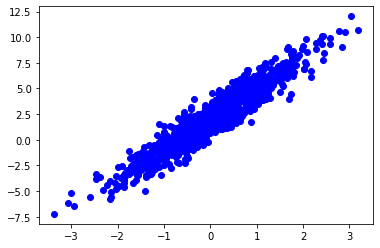

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c="b")
plt.show()

# Without noise 

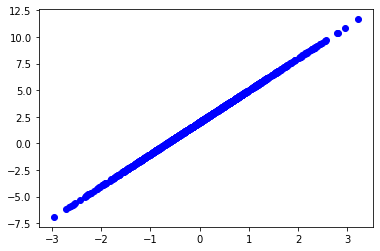

In [37]:
y=x*TRUE_W +TRUE_B
import matplotlib.pyplot as plt
plt.scatter(x,y,c="b")
plt.show()

# Lets define a model

In [22]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # initials weights
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        return self.w*x+self.b

In [23]:
class Test:
    def __init__(self,x):
        self.x=x
    def __call__(self):
        return self.x**3
    

In [24]:
obj=Test(2)
obj

In [25]:
obj()

8

In [26]:
model=MyModel()

In [27]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [28]:
model

In [29]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [32]:
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

## Lets define the loss fiúnction

In [40]:
def MSE_loss(target_y, predicted_y):
    error=target_y-predicted_y
    squared_error=tf.square(error)
    mse=tf.reduce_mean(squared_error)
    return mse

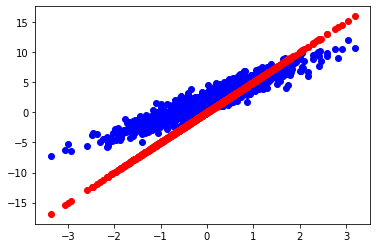

In [41]:
plt.scatter(x,y,c="b")
pred_y=model(x)
plt.scatter(x,pred_y,c="r")
plt.show()

In [42]:
current_loss=MSE_loss(y, model(x))
current_loss.numpy()

8.802406

### Define training

In [43]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_loss=MSE_loss(y, model(x))
    dc_dw, dc_db=tape.gradient(current_loss,[model.w, model.b])
    # update weight and bias
    model.w.assign_sub(learning_rate*dc_dw)
    model.b.assign_sub(learning_rate*dc_db)
    

In [44]:
model=MyModel()

In [45]:
Ws,bs=[],[]
epochs=100
learning_rate=0.1
w=model.w.numpy()
b=model.b.numpy()
initial_loss=MSE_loss(y, model(x)).numpy()
print(f"Iniatial W: {w}, Initial bias: {b}, initial_loss: {initial_loss}")

Iniatial W: 5.0, Initial bias: 0.0, initial_loss: 8.802406311035156


In [46]:
for epoch in range(epochs):
    train(model,x,y,learning_rate)
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss=MSE_loss(y,model(x))
    print(f"For epoch: {epoch}, W: {Ws[-1]}, b: {bs[-1]}, Current_loss: {current_loss}")

For epoch: 0, W: 4.6167731285095215, b: 0.396369993686676, Current_loss: 6.056051731109619
For epoch: 1, W: 4.305292129516602, b: 0.7140806317329407, Current_loss: 4.267422676086426
For epoch: 2, W: 4.052131652832031, b: 0.9687486886978149, Current_loss: 3.102308988571167
For epoch: 3, W: 3.8463780879974365, b: 1.172889232635498, Current_loss: 2.3432090282440186
For epoch: 4, W: 3.6791582107543945, b: 1.336531639099121, Current_loss: 1.8485429286956787
For epoch: 5, W: 3.543259382247925, b: 1.467713713645935, Current_loss: 1.5261340141296387
For epoch: 6, W: 3.4328176975250244, b: 1.5728774070739746, Current_loss: 1.3159584999084473
For epoch: 7, W: 3.343066930770874, b: 1.657185435295105, Current_loss: 1.1789215803146362
For epoch: 8, W: 3.270132303237915, b: 1.724775791168213, Current_loss: 1.089555263519287
For epoch: 9, W: 3.210864782333374, b: 1.7789651155471802, Current_loss: 1.031266212463379
For epoch: 10, W: 3.1627042293548584, b: 1.8224115371704102, Current_loss: 0.9932402968

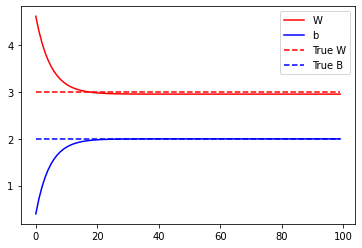

In [47]:
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, "b")
plt.plot([TRUE_W]*epochs, "r--", [TRUE_B]*epochs, "b--")
plt.legend(["W","b", "True W", "True B"])
plt.show()

In [ ]:
plt.scatter(Xy)